In [36]:
#Nhập thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#Nhập dataset
df=pd.read_csv("D:/medical_insurance.csv")

In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


### Làm sạch dữ liệu

- Xử lý giá trị thiếu

In [40]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [41]:
#kiểm tra giá trị thiếuthiếu

- Xử lý giá trị trùng lặp

In [42]:
#Kiểm tra giá trị trùng lặp
df.duplicated().sum()

np.int64(1435)

In [43]:
#Loại bỏ giá trị trùng lặp
df=df.drop_duplicates()

## Khám phá dữ liệu EDA

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

### Phân tích phân phối của các biến số

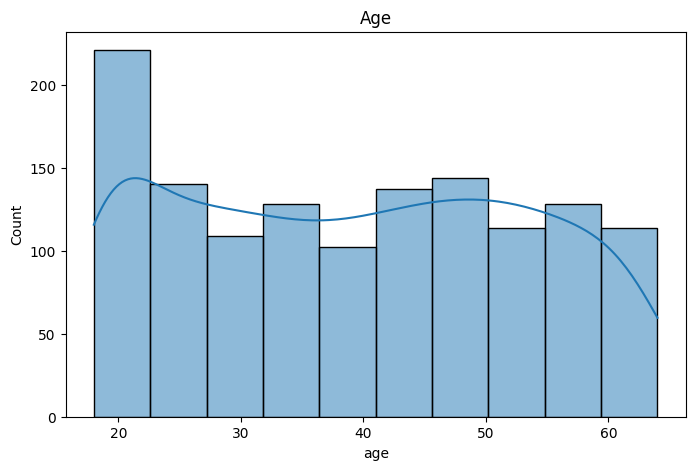

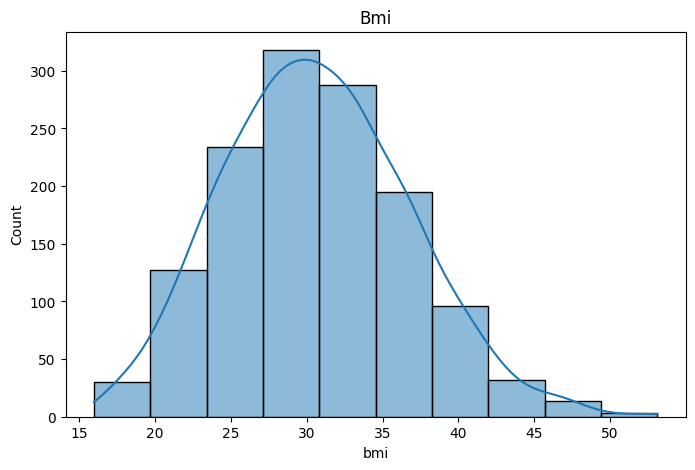

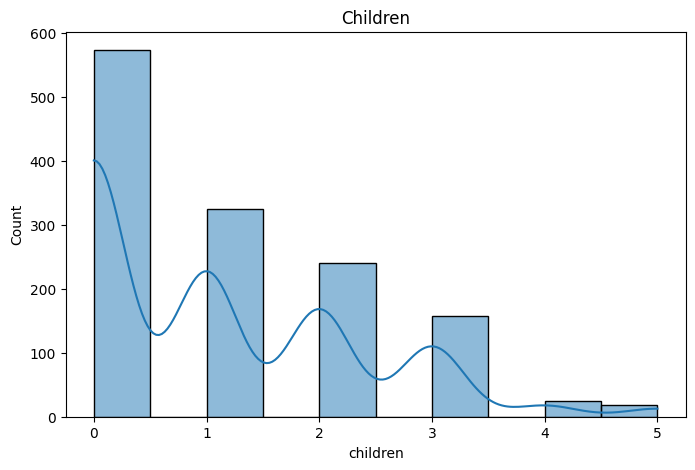

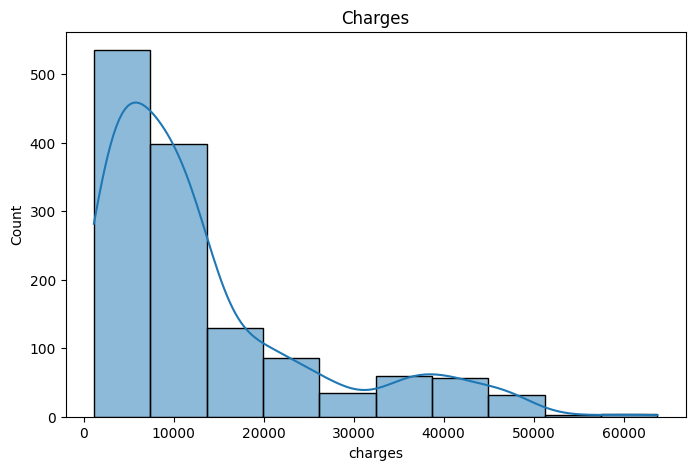

In [45]:
# Danh sách các biến cần vẽ biểu đồ
num_columns = ['age', 'bmi', 'children', 'charges'] 

# Vẽ biểu đồ phân phối cho mỗi biến trong danh sách
for col in num_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(col.capitalize())
    plt.show()

### Phân tích của các biến phân loại

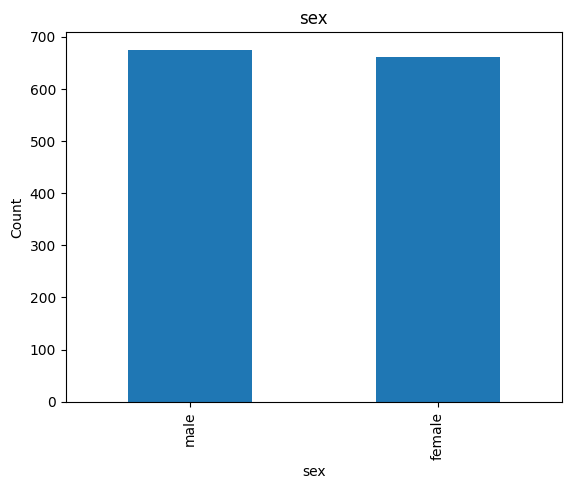

In [46]:
df['sex'].value_counts().plot(kind='bar')

plt.title('sex')
plt.ylabel('Count')

plt.show()

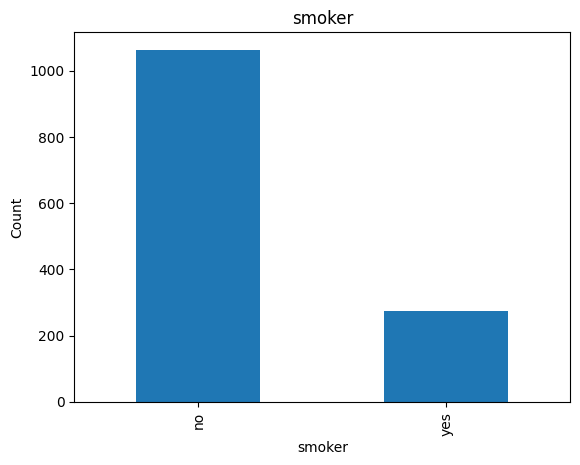

In [47]:
df['smoker'].value_counts().plot(kind='bar')

plt.title('smoker')
plt.ylabel('Count')

plt.show()

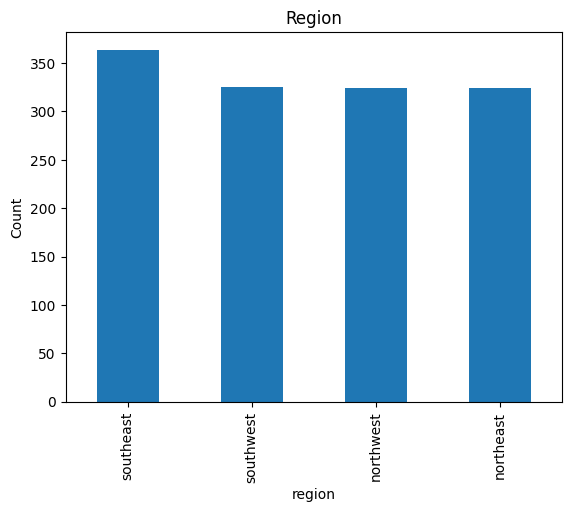

In [48]:
df['region'].value_counts().plot(kind='bar')

plt.title('Region')
plt.ylabel('Count')

plt.show()

### Tương quan giữa các biến với chi phí bảo hiềm

C:\Users\Admin\AppData\Local\Temp\ipykernel_16928\1836961597.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age',y='charges',data=df,palette='husl', ci=None)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16928\1836961597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age',y='charges',data=df,palette='husl', ci=None)


<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

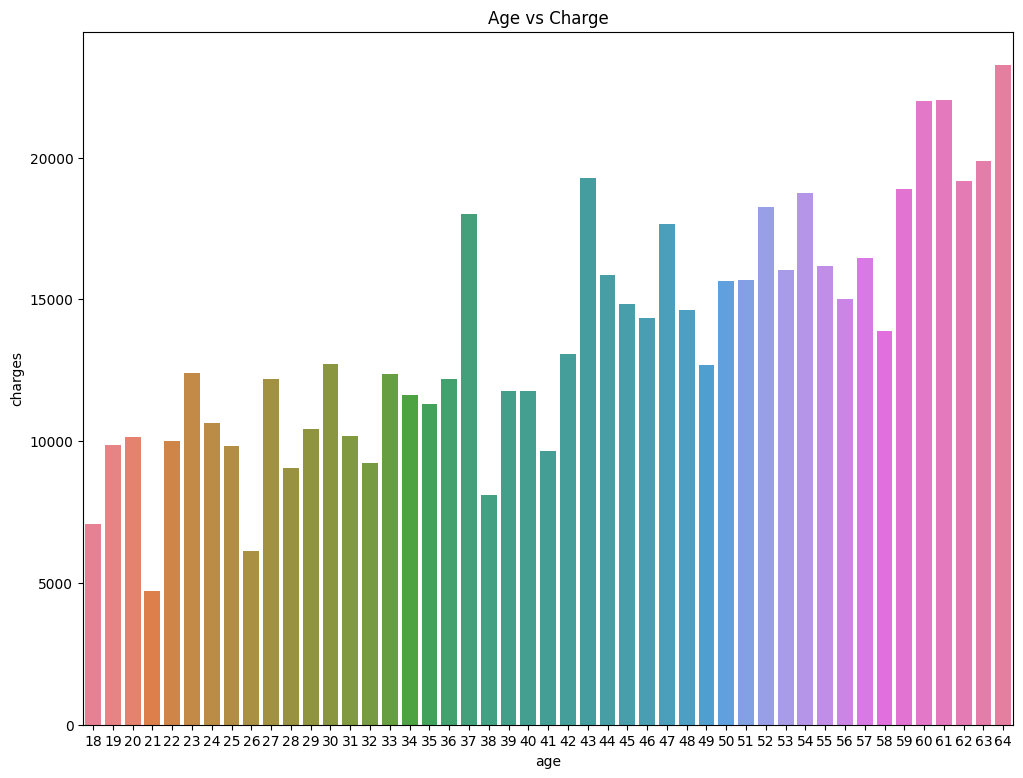

In [49]:
# Age vs Charge
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df,palette='husl', ci=None)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16928\189198884.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='children',y='charges',data=df, ci=None)


<Axes: title={'center': 'Children vs Charge'}, xlabel='children', ylabel='charges'>

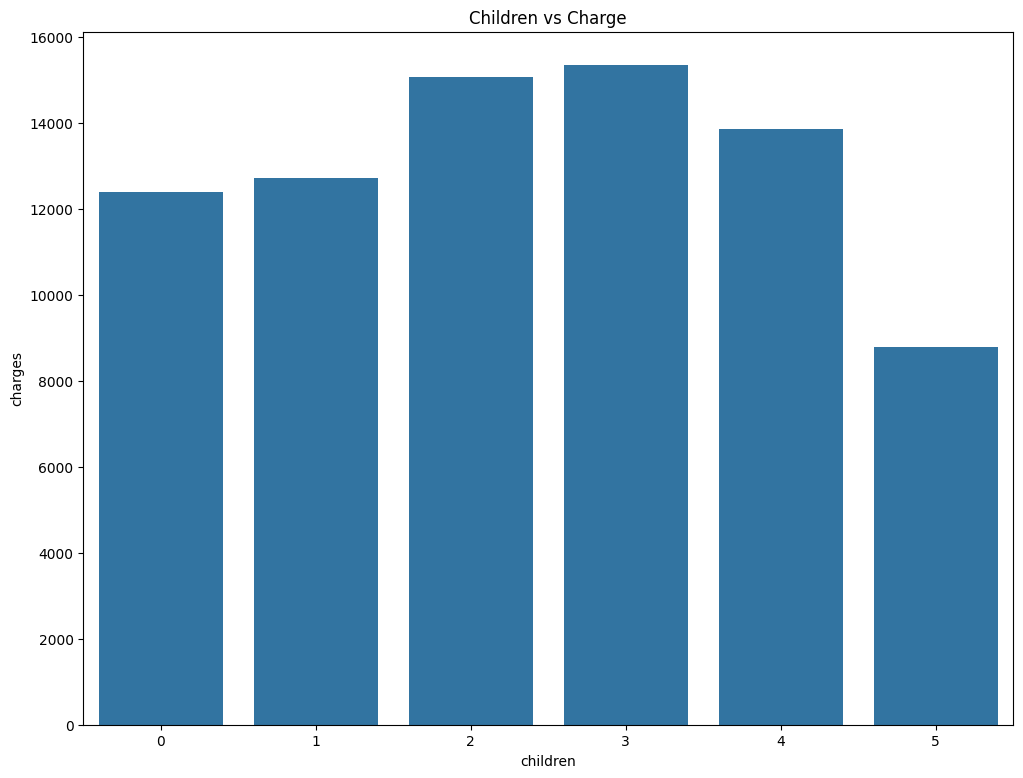

In [50]:
#Children & Charge
plt.figure(figsize=(12,9))
plt.title('Children vs Charge')
sns.barplot(x='children',y='charges',data=df, ci=None)

Text(0.5, 1.0, 'BMI VS Charge')

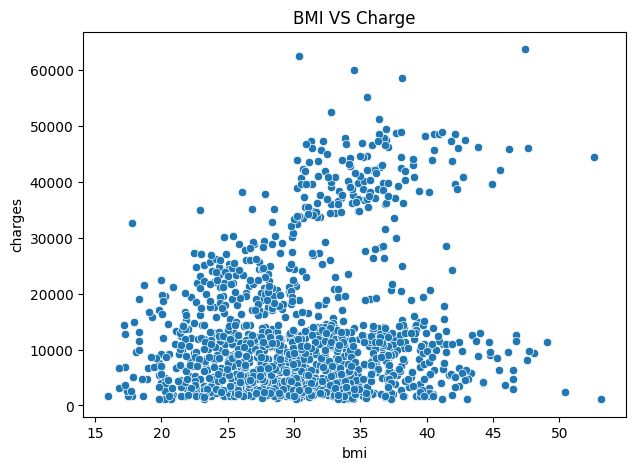

In [51]:
#BMI & Charge
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',data=df)
plt.title('BMI VS Charge')

### Mối quan hệ giữa các biến số

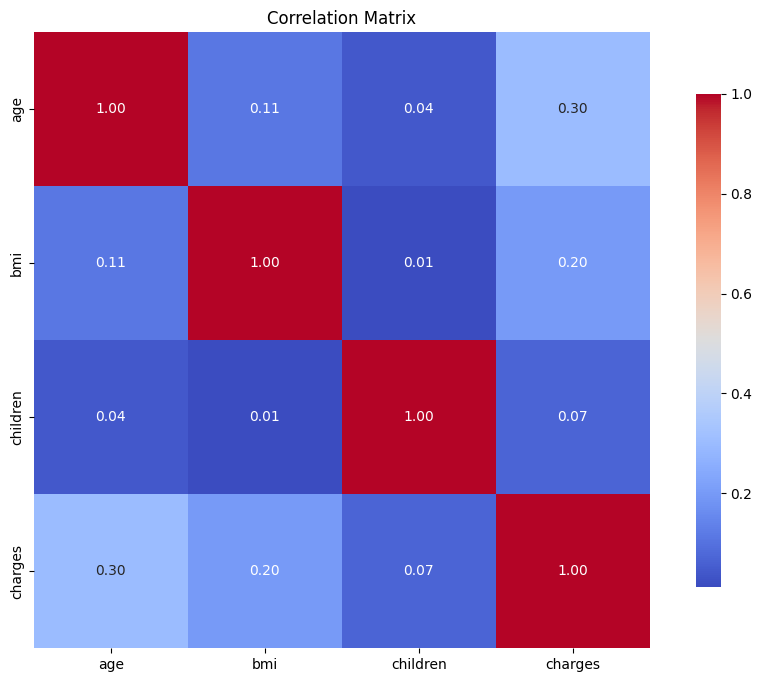

In [52]:
# Lọc ra các biến số trong DataFrame
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Tính toán ma trận tương quan chỉ cho các biến số
correlation_matrix = df[numerical_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

## Tiền xử lý dữ liệu (Data Preprocessing)

### Xử lý Dữ liệu bị lệch 

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

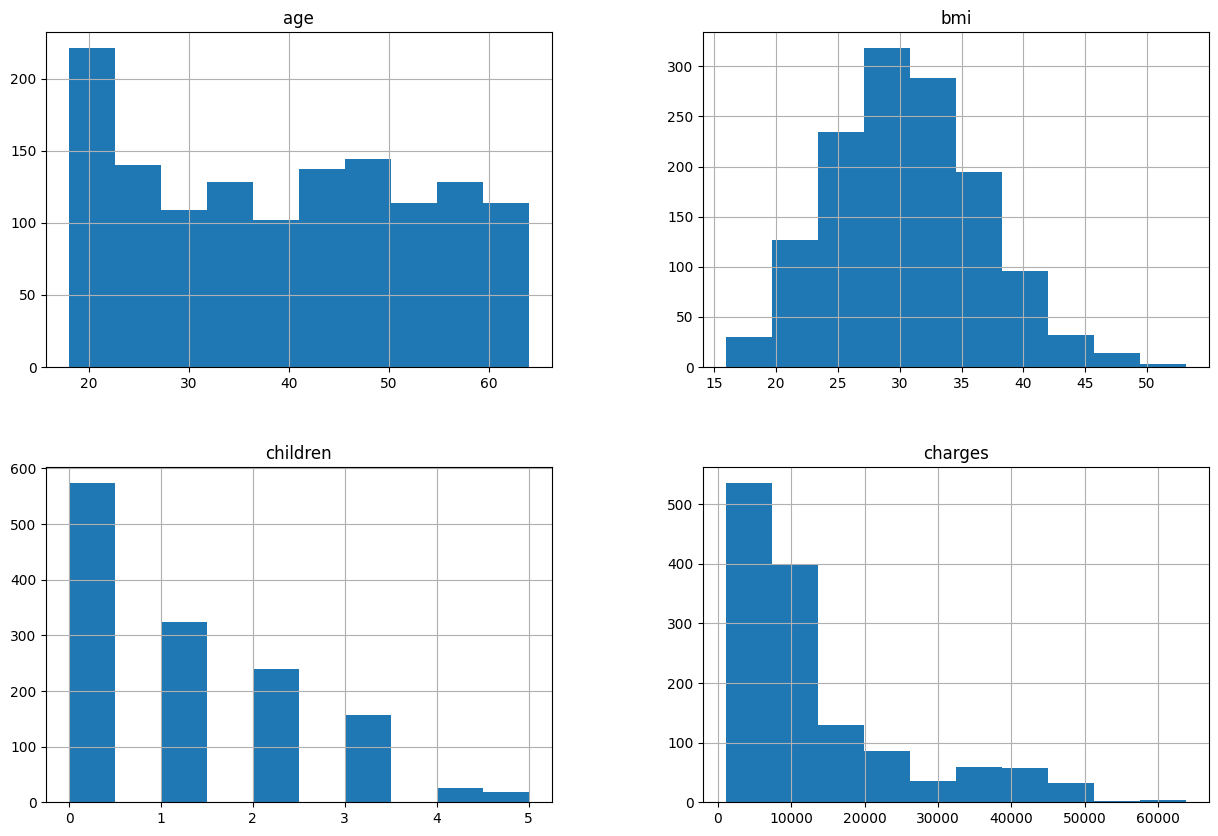

In [53]:
#phân bố dữ liệu
df.hist(figsize=(15,10))

In [54]:
from scipy.stats import skew
print("Chỉ số skewness của cột 'age':",skew(df['age']))
print("Chỉ số skewness của cột 'bmi':",skew(df['bmi']))
print("Chỉ số skewness của cột 'charges':",skew(df['charges']))

Chỉ số skewness của cột 'age': 0.054719294607049676
Chỉ số skewness của cột 'bmi': 0.2835955670169306
Chỉ số skewness của cột 'charges': 1.5136902413349014


In [55]:
from scipy import stats
import matplotlib.pyplot as plt

# Định nghĩa hàm để vẽ các biểu đồ và tính skewness
def plot_distribution_and_skewness(transformed_column, title):
    plt.figure(figsize=(6, 3))
    # Vẽ histogram cho cột dữ liệu
    plt.hist(transformed_column, bins=10, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution after {title}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
        # Tính skewness và in ra
    skewness = stats.skew(transformed_column)  
    print(f'Skewness after {title}: {skewness}')

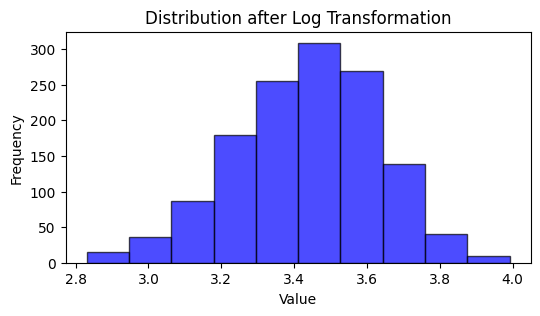

Skewness after Log Transformation: -0.2376967142034665


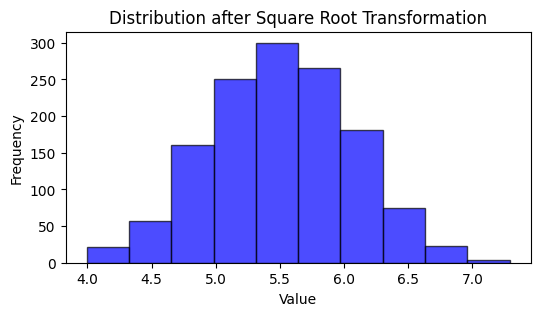

Skewness after Square Root Transformation: 0.014211063021874224


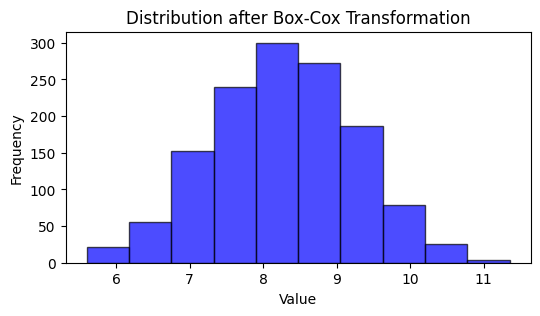

Skewness after Box-Cox Transformation: -0.007146470540237415


In [56]:
#Cột BMI

# 1. Log Transformation
plot_distribution_and_skewness(np.log1p(df['bmi']), 'Log Transformation')

# 2. Square Root Transformation
plot_distribution_and_skewness(np.sqrt(df['bmi']), 'Square Root Transformation')

# 3. Box-Cox Transformation
boxcox_value, lambda_value = stats.boxcox(df['bmi'])
plot_distribution_and_skewness(boxcox_value, 'Box-Cox Transformation')


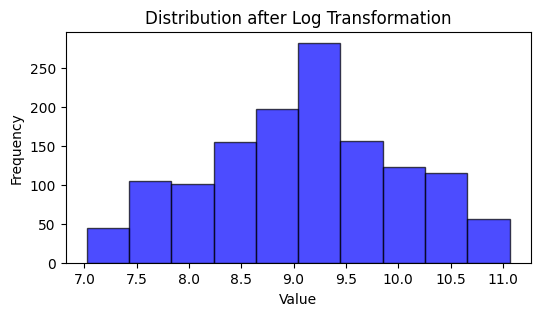

Skewness after Log Transformation: -0.08945784257066682


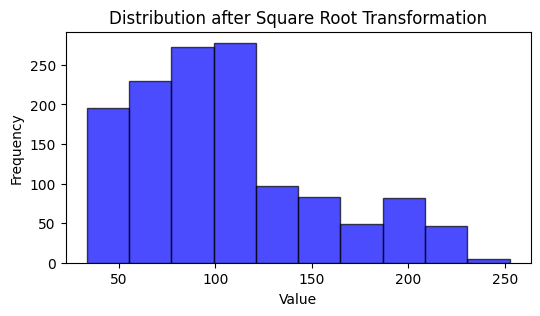

Skewness after Square Root Transformation: 0.7951012582200259


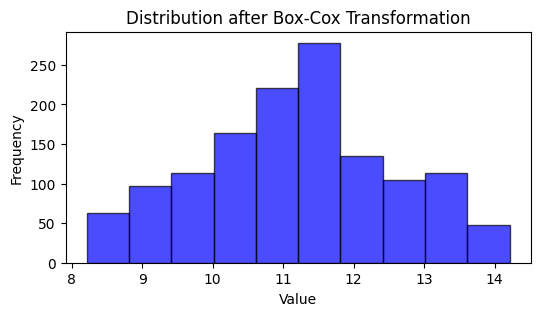

Skewness after Box-Cox Transformation: -0.008664562166442319


In [57]:
#Cột charges

# 1. Log Transformation
plot_distribution_and_skewness(np.log1p(df['charges']), 'Log Transformation')

# 2. Square Root Transformation
plot_distribution_and_skewness(np.sqrt(df['charges']), 'Square Root Transformation')

# 3. Box-Cox Transformation
boxcox_value, lambda_value = stats.boxcox(df['charges'])
plot_distribution_and_skewness(boxcox_value, 'Box-Cox Transformation')


##### Sau khi so sánh chỉ số Skewness -> chọn phương pháp Box-Cox Transformation

In [58]:
# Biến đổi charges và lưu giá trị lambda
df['charges'], lambda_charges = stats.boxcox(df['charges'])
# Biến đổi bmi và lưu giá trị lambda
df['bmi'], lambda_bmi = stats.boxcox(df['bmi'])

In [59]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,7.882305,0,yes,southwest,12.120634
1,18,male,8.806054,1,no,southeast,8.804026
2,28,male,8.690111,3,no,southeast,10.141549
3,33,male,6.972517,0,no,northwest,12.526076
4,32,male,8.043361,0,no,northwest,9.939887
...,...,...,...,...,...,...,...
1333,50,male,8.377256,3,no,northwest,11.416735
1334,18,female,8.525002,0,no,northeast,9.145579
1335,18,female,9.256115,0,no,southeast,8.725190
1336,21,female,7.526579,0,no,southwest,9.014352


### Mã hóa biến phân loại

In [60]:
# Sử dụng one-hot encoding cho cột 'region' 
df_encoded = pd.get_dummies(df['region'])

# Nối kết quả vào DataFrame ban đầu
df = df.join(df_encoded)

# Xóa cột ban đầu nếu không cần
df.drop(columns='region', inplace=True)

#Chuyển đổi cột giới tính, smoker
df.sex= df.sex.map({'male':0, 'female':1})
df.smoker= df.smoker.map({'no':0, 'yes':1})

### Chuẩn hóa dữ liệu

In [61]:
from sklearn.preprocessing import StandardScaler

# Tạo đối tượng StandardScaler
scaler = StandardScaler()

# Chọn các cột để chuẩn hóa
columns_to_scale = ['age','bmi']

# Áp dụng chuẩn hóa
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [62]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,-1.440418,1,-0.409511,0,1,12.120634,False,False,False,True
1,-1.511647,0,0.548697,1,0,8.804026,False,False,True,False
2,-0.799350,0,0.428429,3,0,10.141549,False,False,True,False
3,-0.443201,0,-1.353238,0,0,12.526076,False,True,False,False
4,-0.514431,0,-0.242447,0,0,9.939887,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,0.103903,3,0,11.416735,False,True,False,False
1334,-1.511647,1,0.257160,0,0,9.145579,True,False,False,False
1335,-1.511647,1,1.015546,0,0,8.725190,False,False,True,False
1336,-1.297958,1,-0.778507,0,0,9.014352,False,False,False,True


### Chia dữ liệu thành tập train test

In [63]:
from sklearn.model_selection import train_test_split

# Xác định các biến đầu vào và biến mục tiêu
X=df.drop(columns='charges')
y=df['charges']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


## Huấn luyện mô hình

In [64]:
#Cài đặt các thư viện cần thiết
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Linear regression

In [65]:
#Huấn luyện mô hình
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [66]:
#dự báo
y_pred_lin_reg=lin_reg.predict(X_test)

In [67]:
# Dự đoán trên tập kiểm tra
y_pred_lin_reg = lin_reg.predict(X_test)

# Chuyển đổi ngược cho charges
y_pred_lin_reg = (y_pred_lin_reg * lambda_charges + 1) ** (1 / lambda_charges)

# Chuyển đổi ngược y_test để tính toán các chỉ số
y_test = (y_test * lambda_charges + 1) ** (1 / lambda_charges)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính toán các chỉ số
mae = mean_absolute_error(y_test, y_pred_lin_reg)
mse = mean_squared_error(y_test, y_pred_lin_reg)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_lin_reg)

print('Linear Regression:')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Linear Regression:
MAE: 3661.4044378760163
MSE: 46725743.54478659
RMSE: 6835.623127761403
R²: 0.7457186309000619


### Random forest regressor

#### Tìm ra bộ siêu tham số tối ưu nhất 

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Khởi tạo mô hình Random Forest
rf = RandomForestRegressor(random_state=42)

# Định nghĩa bộ siêu tham số
param_grid = {
    'n_estimators': [100, 200, 300],  # Số lượng cây
    'max_depth': [None, 10, 20, 30],  # Độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10],  # Số mẫu tối thiểu để phân chia một nút
    'min_samples_leaf': [1, 2, 4],  # Số mẫu tối thiểu ở lá
}

# Khởi tạo Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Thực hiện tìm kiếm grid
grid_search.fit(X_train, y_train)

# Lấy ra mô hình tốt nhất và các siêu tham số tối ưu
best_rf = grid_search.best_estimator_
print("Bộ siêu tham số tốt nhất:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Bộ siêu tham số tốt nhất: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [71]:
# Huấn luyện mô hình tốt nhất trên toàn bộ dữ liệu huấn luyện
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=300, random_state=42)

In [72]:
# Dự đoán trên tập kiểm tra
y_pred_best_rf = best_rf.predict(X_test)

# Chuyển đổi ngược cho charges
y_pred_best_rf = (y_pred_best_rf * lambda_charges + 1) ** (1 / lambda_charges)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính toán các chỉ số
mae_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_best_rf)

print('Random Forest Regressor:')
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R²: {r2_rf}")

Random Forest Regressor:
MAE: 1970.0625876299976
MSE: 17785880.766797747
RMSE: 4217.331000383743
R²: 0.903209285311968


### Dự đoán thử với random forest regressor

In [74]:
from scipy.stats import boxcox
bmi_boxcox = boxcox(26.2, lambda_bmi)
age = 22
sex = 1
children = 0
smoker = 0
northeast = 1
northwest = 0
southeast = 0
southwest = 0

# Chuyển dữ liệu đầu vào thành numpy array và thêm tên cột cho dễ hiểu
input_data = np.array([age,sex,bmi_boxcox, children, smoker, northeast, northwest, southeast, southwest])

# Áp dụng scaler cho các cột chỉ định
input_data_scaled = input_data.copy()
input_data_scaled[[0, 2]] = scaler.transform(input_data[[0, 2]].reshape(-1, 2))[:, 0]

# Định hình lại dữ liệu (vì mô hình yêu cầu dữ liệu 2D cho dự đoán)
input_data_scaled = input_data_scaled.reshape(1, -1)

# Dự đoán chi phí y tế với mô hình
insurance_premium_boxcox = best_rf.predict(input_data_scaled)

# Đảo ngược biến đổi Box-Cox để đưa kết quả về giá trị ban đầu
insurance_premium = (insurance_premium_boxcox * lambda_charges + 1) ** (1 / lambda_charges)

print(f"Dự đoán chi phí y tế: {insurance_premium[0]:.2f}")

Dự đoán chi phí y tế: 2350.45


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## XGBoost

In [75]:
import xgboost as xgb
#Khởi tạo mô hình XGBoost
xg= xgb.XGBRegressor(objective='reg:squarederror', randomstate=42)

param_grid = {
    'n_estimators': [100, 200, 300],    #Số lượng cây
    'learning_rate': [0.01, 0.1, 0.2],  #Tốc độ học
    'max_depth': [3, 5, 7],             #Độ sâu tối đa của mỗi cây
    'subsample': [0.8, 1.0],            #Tỷ lệ số mẫu được chọn ngẫu nhiên cho mỗi cây
    'colsample_bytree': [0.8, 1.0],     #Tỷ lệ số đặc trưng được chọn ngẫu nhiên ở mỗi cây
}

#Khởi tạo GridSearch 
Xgb_model = GridSearchCV(estimator=xg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
Xgb_model.fit(X_train, y_train)

#Lấy ra mô hình tốt nhất và bộ siêu tham số tối ưu
best_Xgb = Xgb_model.best_estimator_
print("Best parameters:", Xgb_model.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:31:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "randomstate" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:31:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "randomstate" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:31:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "randomstate" } are not used.

  warn

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


In [76]:
#Huấn luyện với mô hình tốt nhất
best_Xgb.fit(X_train, y_train)

#Dự đoán trên tập kiểm tra
y_pred_Xgb = best_Xgb.predict(X_test)

# Chuyển đổi ngược cho charges
y_pred_Xgb = (y_pred_Xgb * lambda_charges + 1) ** (1 / lambda_charges)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:35:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "randomstate" } are not used.

  warnings.warn(smsg, UserWarning)


In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính toán các chỉ số
mae_Xgb = mean_absolute_error(y_test, y_pred_Xgb)
mse_Xgb = mean_squared_error(y_test, y_pred_Xgb)
rmse_Xgb = mse_Xgb ** 0.5
r2_Xgb = r2_score(y_test, y_pred_Xgb)

print('XGBoost:')
print(f"MAE: {mae_Xgb}")
print(f"MSE: {mse_Xgb}")
print(f"RMSE: {rmse_Xgb}")
print(f"R²: {r2_Xgb}")

XGBoost:
MAE: 2266.8461897663246
MSE: 21707160.927034527
RMSE: 4659.094432079535
R²: 0.8818696893606761


## GradienBoosting

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

# Khởi tạo mô hình Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_gbr = gbr.predict(X_test)

y_pred_gbr = (y_pred_gbr * lambda_charges + 1) ** (1 / lambda_charges)


In [79]:

# Đánh giá hiệu suất Gradient Boosting Regressor
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = mse_gbr ** 0.5
r2_gbr = r2_score(y_test, y_pred_gbr)

print('Boosting Regressor:')
print(f"MAE: {mae_gbr}")
print(f"MSE: {mse_gbr}")
print(f"RMSE: {rmse_gbr}")
print(f"R²: {r2_gbr}")

Boosting Regressor:
MAE: 2244.9411175104474
MSE: 20955439.859673977
RMSE: 4577.7112031750075
R²: 0.8859605533617271


### So sánh kết quả

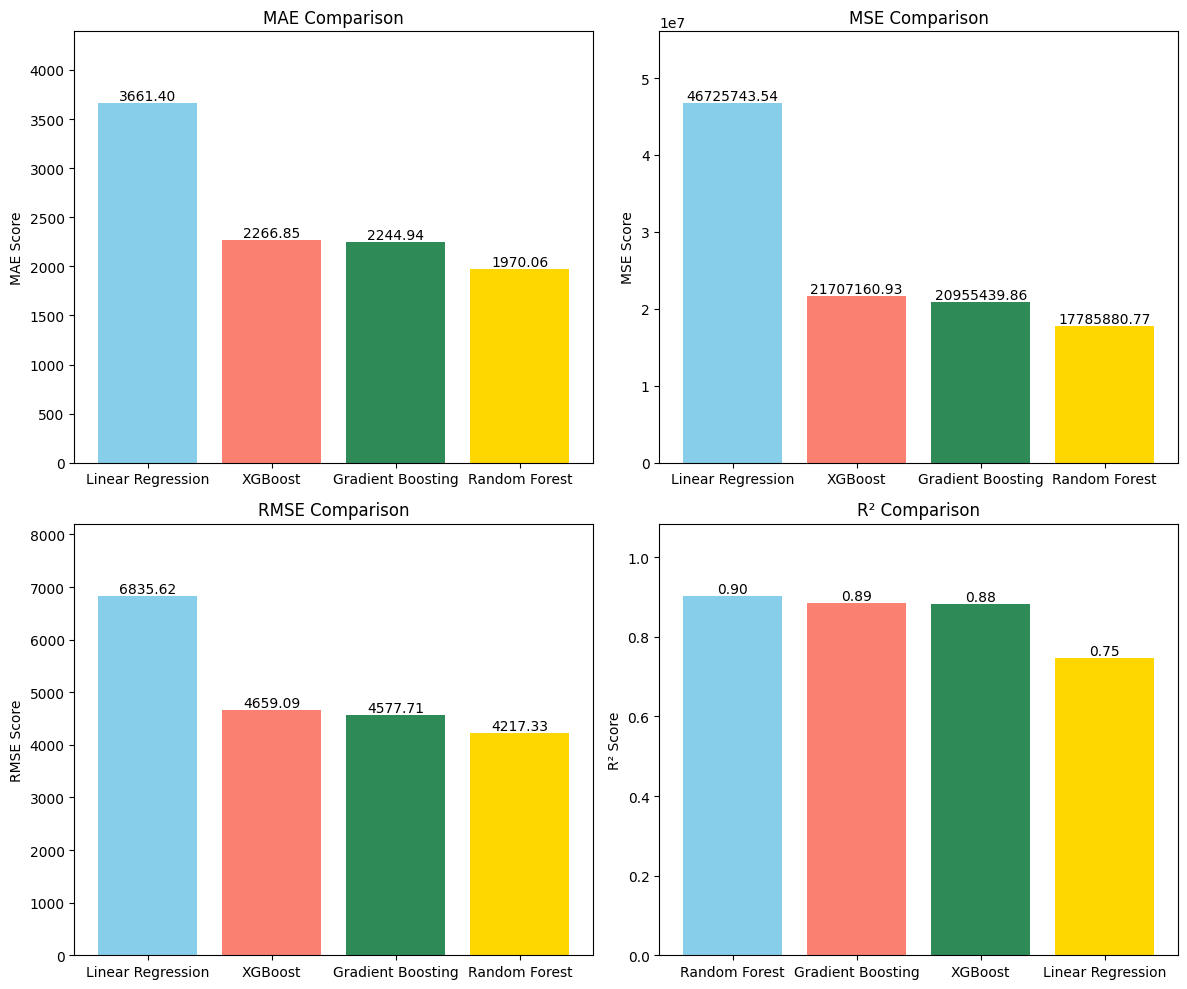

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Tạo hình và các subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Tạo lưới 2x2

# Dữ liệu cho từng chỉ số
metrics_names = ['MAE', 'MSE', 'RMSE', 'R²']
lin_reg_scores = [mae, mse, rmse, r2]
rf_scores = [mae_rf, mse_rf, rmse_rf, r2_rf]
xgb_scores = [mae_Xgb, mse_Xgb, rmse_Xgb, r2_Xgb]
gbr_scores = [mae_gbr, mse_gbr, rmse_gbr, r2_gbr]

# Duyệt qua từng chỉ số để tạo các biểu đồ riêng
for i, metric in enumerate(metrics_names):
    ax = axs[i // 2, i % 2]  # Xác định vị trí subplot
    
    # Tạo danh sách các điểm số và tên mô hình
    scores = [lin_reg_scores[i], rf_scores[i], xgb_scores[i], gbr_scores[i]]
    model_names = ['Linear Regression', 'Random Forest', 'XGBoost', 'Gradient Boosting']
    
    # Sắp xếp các giá trị từ lớn đến bé
    sorted_indices = np.argsort(scores)[::-1]  # Sắp xếp chỉ số từ lớn đến bé
    sorted_scores = [scores[idx] for idx in sorted_indices]
    sorted_model_names = [model_names[idx] for idx in sorted_indices]

    # Vẽ biểu đồ
    ax.bar(sorted_model_names, sorted_scores, color=['skyblue', 'salmon', 'seagreen', 'gold'])
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(f'{metric} Score')
    ax.set_ylim(0, max(sorted_scores) * 1.2)  # Tạo khoảng trống trên trục y
    
    # Hiển thị giá trị trên đầu mỗi thanh
    for j, score in enumerate(sorted_scores):
        ax.text(j, score, f'{score:.2f}', ha='center', va='bottom')

# Điều chỉnh khoảng cách giữa các subplots
plt.tight_layout()
plt.show()


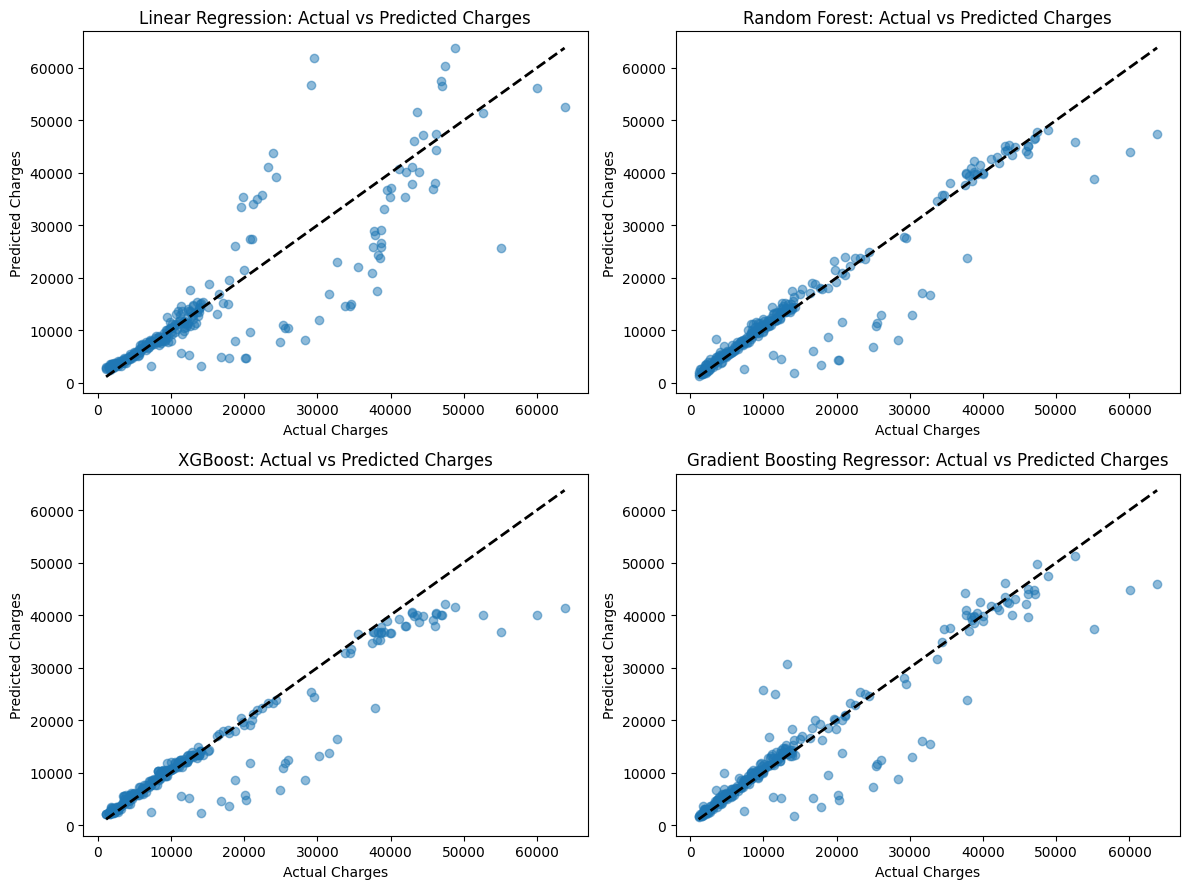

In [81]:
import matplotlib.pyplot as plt

# Tạo hình với lưới 2x2
fig, axs = plt.subplots(2, 2, figsize=(12, 9))

# Danh sách các dự đoán và tiêu đề cho mỗi mô hình
predictions = [y_pred_lin_reg, y_pred_best_rf, y_pred_Xgb, y_pred_gbr]
titles = ['Linear Regression: Actual vs Predicted Charges',
          'Random Forest: Actual vs Predicted Charges',
          'XGBoost: Actual vs Predicted Charges',
          'Gradient Boosting Regressor: Actual vs Predicted Charges']

# Vẽ từng biểu đồ vào subplot tương ứng
for i, ax in enumerate(axs.flat):
    ax.scatter(y_test, predictions[i], alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_xlabel('Actual Charges')
    ax.set_ylabel('Predicted Charges')
    ax.set_title(titles[i])

# Điều chỉnh khoảng cách giữa các subplots
plt.tight_layout()
plt.show()


In [82]:
import pickle as pkl

In [83]:
pkl.dump(scaler, open('my_scaler.pkl','wb'))

In [84]:
pkl.dump(best_rf, open('MIPML.pkl','wb'))